In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [2]:
def promedio(lst):
    return sum(lst)/len(lst)

def desvioEstandar(lst):
    prom = promedio(lst)
    return (sum([(x-prom)**2 for x in lst])/len(lst))**0.5

# www.u-tokyo.ac.jp

In [7]:
dfAllHops = pd.read_csv("experimentos/www.u-tokyo.ac.jp-allHops.csv", sep=",")

with open('experimentos/www.u-tokyo.ac.jp-json.json') as json_data:
    lstDic = json.load(json_data)

lstRtt = [dic['rtt'] for dic in lstDic]
# a los valores null les pongo el promedio del siguiente no null y el anterior no null
# hay 3 null
lstRtt1 = []
lstRttNull = []
lstRtt2 = []
for x in lstRtt:
    if x == 'null':
        break
    lstRtt1.append(x)

hayNull = 3
for x in lstRtt:
    if hayNull == 0:
        lstRtt2.append(x)
    elif x == 'null':
        hayNull-=1

prom = promedio([lstRtt1[len(lstRtt1)-1], lstRtt2[0]])
lstRttNull = [lstRtt1[len(lstRtt1)-1]] + [prom, prom, prom] + [lstRtt2[0]]

## RTT entre saltos (restar los valores promediados a cada salto)

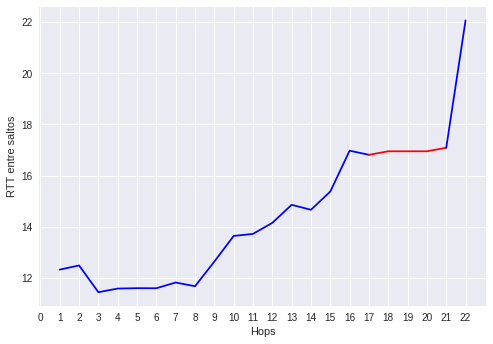

In [8]:
lstX1 = range(1,len(lstRtt1)+1)
lstXNull = range(len(lstRtt1), len(lstRtt1) + len(lstRttNull))
lstX2 = range(len(lstRtt1) + len(lstRttNull) -1, len(lstRtt1) + len(lstRttNull) + len(lstRtt2)-1)

plt.plot(lstX1, lstRtt1, 'blue')
plt.plot(lstXNull, lstRttNull, 'red')
plt.plot(lstX2, lstRtt2, 'blue')

plt.ylabel('RTT entre saltos')
plt.xlabel('Hops')
plt.xticks(range(len(lstRtt)+1), range(len(lstRtt)+1))
plt.show()

## RTT entre saltos en la ruta, graficar el valor (X i − X̄)/S

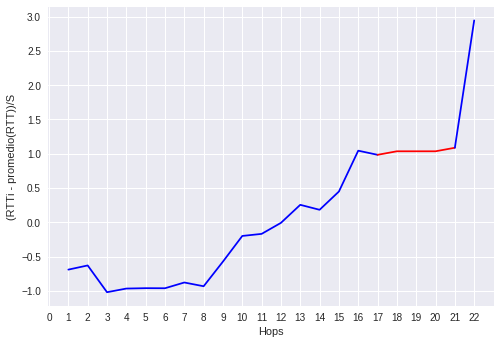

In [9]:
prom = promedio(lstRtt1 + [promedio([lstRtt1[len(lstRtt1)-1], lstRtt2[0]])] + lstRtt2)
s = desvioEstandar(lstRtt1 + [promedio([lstRtt1[len(lstRtt1)-1], lstRtt2[0]])] + lstRtt2)
lstVal1 = [(x-prom)/s for x in lstRtt1]
lstValNull = [(x-prom)/s for x in lstRttNull]
lstVal2 = [(x-prom)/s for x in lstRtt2]

lstX1 = range(1,len(lstRtt1)+1)
lstXNull = range(len(lstRtt1), len(lstRtt1) + len(lstRttNull))
lstX2 = range(len(lstRtt1) + len(lstRttNull) -1, len(lstRtt1) + len(lstRttNull) + len(lstRtt2)-1)

plt.plot(lstX1, lstVal1, 'blue')
plt.plot(lstXNull, lstValNull, 'red')
plt.plot(lstX2, lstVal2, 'blue')
plt.ylabel('(RTTi - promedio(RTT))/S')
plt.xlabel('Hops')
plt.xticks(range(len(lstRtt)+1), range(len(lstRtt)+1))
plt.show()

## Porcentaje que no responden los Time exceeded

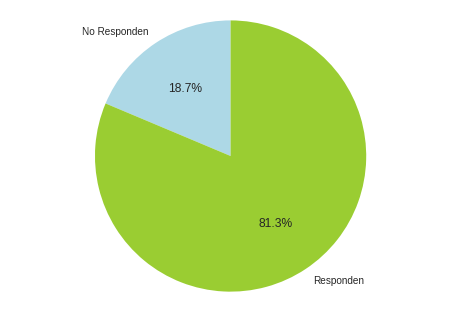

In [10]:
maxVal = max(set(dfAllHops['hop_num']))
lstTE = dfAllHops[dfAllHops['hop_num'] < maxVal]['ip_address']
cantNull = 0
for ip in lstTE:
    if ip == 'null':
        cantNull+=1

porcentajes = [cantNull, len(lstTE) - cantNull]

labels = 'No Responden', 'Responden'
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['lightblue', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Saltos Internacionales